# Case 1. Heart Disease Classification
Markus Pikkanen<br>
Last edited: 18.01.2018<br>
Cognitive Systems for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

## 1. Objectives

- learn to read data from external sources using pandas’ read_csv -function
- use keras’ neural networks to make an expert system to support in diagnostic decision making
- learn to test model architectures (number of layers, number of units, activation functions), solver optimizers and training settings (epochs, batch sizes, validation splits)
- use matplotlib’s visualization tools to make graphical presentations of the training and validation results
- learn to document the results clearly and in easily readable format

## 2. Required libraries

In [32]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

## 3. Data description and preprocessing

Description to data:
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names<br>
Data contains 303 records of paitent data. More detailed description can be found from the link above. The num column indicates if the patient is diagnosed with heart disease (>=1) or is not (0). The sevierty of the disease is indicated by numbers ranging from one to four. For this study there is too little data to train the neural network for all the 5 different classifications. So the data is processed to contain only information if the patient is diagnosed (1) or not diagnosed (0) with heart disease. All the missing values are replaced with median of the corresponding attribute.

In [33]:
url = r'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

dataframe = pd.read_csv(url,
                   header=None,
                   index_col=None,
                   na_values='?')

dataframe.columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
                'thalach','exang','oldpeak','slope','ca','thal','num']

# Fill missing data with columnwise median values
dataframe = dataframe.fillna(dataframe.median())

# Select the data (input) columns
data_list = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs','restecg',
             'thalach','exang','oldpeak','slope','ca','thal']
data = dataframe[data_list]

# Scale the data
data_min = data.min()
data_max = data.max()
data_norm = (data - data_min)/(data_max - data_min)

# Select the labels (output)
labels = dataframe['num']

# Make binary labels (diseased or not diseased)
bin_labels = 1.0*(labels > 0.0)

data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null float64
thal        303 non-null float64
dtypes: float64(13)
memory usage: 30.9 KB


## 4. Modeling and compilation




Model uses two hidden layers both with rectified linear unit activation function. First layer having 39 neurons and the other 19 layers. Adaptive learning rate method is used to optimize the model.<br>26% of the data is left for validation. Rest is used for training the model.

In [212]:
train_data,val_data,train_label,val_label = train_test_split(data_norm,
                                                               bin_labels,
                                                               test_size=0.26,
                                                               random_state=42)



model = Sequential()
model.add(Dense(30,activation='relu', input_dim=13))
model.add(Dense(15,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adadelta',
             loss='binary_crossentropy',
             metrics=['accuracy'])

## 5. Training and Validation

With adadelta optimizer the minimum loss value is found really fast so fewer epochs needed than for example with SGD optimizer.

In [213]:
start = time.time()

history = model.fit(train_data,
                    train_label,
                    epochs=30,
                    batch_size=30,
                    verbose=0,
                    validation_data=(val_data,val_label))

end = time.time()

print('time: ', end - start)

time:  2.3424203395843506


## 7. Results

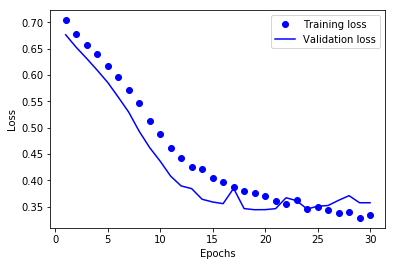

0.35745491181747824


In [214]:
h_dict = history.history
epochs = range(1, len(h_dict['loss'])+1)

plt.plot(epochs, h_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, h_dict['val_loss'], 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(h_dict['val_loss'][len(h_dict['val_loss'])-1])

After around 25-30 epochs the model starts to overfit and the validation. Validation loss is around 0.37 at best.

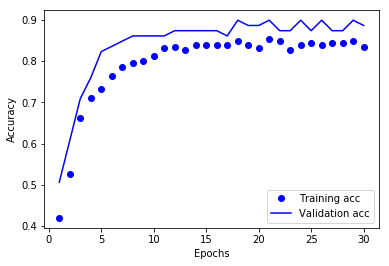

0.8860759486125994


In [215]:
plt.plot(epochs, h_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, h_dict['val_acc'], 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(h_dict['val_acc'][len(h_dict['val_acc'])-1])

Validation accuracy varies around 0.85-0.89

## 8. Conclusions

With this small set of data (303) we are able to attain a fairly high accuracy for our model (~0.87). This would not still be enough for real life use. Changing around the layer count, epochs and so on doesn't yeld any better results. Only step would be to increase the size of records to train the model.